In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 3s - loss: 1.6493 - accuracy: 0.2969
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 1s 37ms/step - loss: 1.5892 - accuracy: 0.2547 - val_loss: 1.4360 - val_accuracy: 0.2873
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.5746 - accuracy: 0.2266
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 1.4753 - accuracy: 0.2509 - val_loss: 1.3539 - val_accuracy: 0.2873
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.4260 - accuracy: 0.2891
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 1.4027 - accuracy: 0.2791 - val_loss: 1.2952 - val_accuracy: 0.3099
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.3580 - accuracy: 0.2891
Epoch 4: sav

9/9 [==============================] - 0s 12ms/step - loss: 0.4754 - accuracy: 0.8280 - val_loss: 0.2054 - val_accuracy: 0.9972
Epoch 29/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.9062
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.4777 - accuracy: 0.8412 - val_loss: 0.1907 - val_accuracy: 0.9972
Epoch 30/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.8203
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 0.4877 - accuracy: 0.8233 - val_loss: 0.1778 - val_accuracy: 0.9972
Epoch 31/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4812 - accuracy: 0.8281
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.4603 - accuracy: 0.8468 - val_loss: 0.

Epoch 56/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3164 - accuracy: 0.8672
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.2871 - accuracy: 0.8957 - val_loss: 0.0513 - val_accuracy: 0.9972
Epoch 57/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8984
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.3090 - accuracy: 0.8938 - val_loss: 0.0516 - val_accuracy: 0.9972
Epoch 58/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8750
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 10ms/step - loss: 0.2988 - accuracy: 0.8919 - val_loss: 0.0525 - val_accuracy: 0.9972
Epoch 59/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9375
Epoch

1/9 [==>...........................] - ETA: 0s - loss: 0.1371 - accuracy: 0.9609
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.1696 - accuracy: 0.9455 - val_loss: 0.0198 - val_accuracy: 0.9972
Epoch 111/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1671 - accuracy: 0.9531
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 11ms/step - loss: 0.1854 - accuracy: 0.9408 - val_loss: 0.0196 - val_accuracy: 0.9972
Epoch 112/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1230 - accuracy: 0.9609
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 0.1707 - accuracy: 0.9417 - val_loss: 0.0192 - val_accuracy: 0.9972
Epoch 113/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1274 - accuracy: 0.9531
Epoch 113: sa

8/9 [=========================>....] - ETA: 0s - loss: 0.1444 - accuracy: 0.9541
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 30ms/step - loss: 0.1453 - accuracy: 0.9539 - val_loss: 0.0163 - val_accuracy: 0.9972
Epoch 165/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1820 - accuracy: 0.9297
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 0.1441 - accuracy: 0.9521 - val_loss: 0.0165 - val_accuracy: 0.9972
Epoch 166/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1188 - accuracy: 0.9531
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 21ms/step - loss: 0.1345 - accuracy: 0.9530 - val_loss: 0.0169 - val_accuracy: 0.9972
Epoch 167/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.0892 - accuracy: 0.9609
Epoch 167: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9972


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 96ms/step
[9.9254274e-01 6.0715398e-04 6.3382792e-03 5.1178009e-04]
0


# Confusion matrix

12/12 [==============================] - 0s 1ms/step


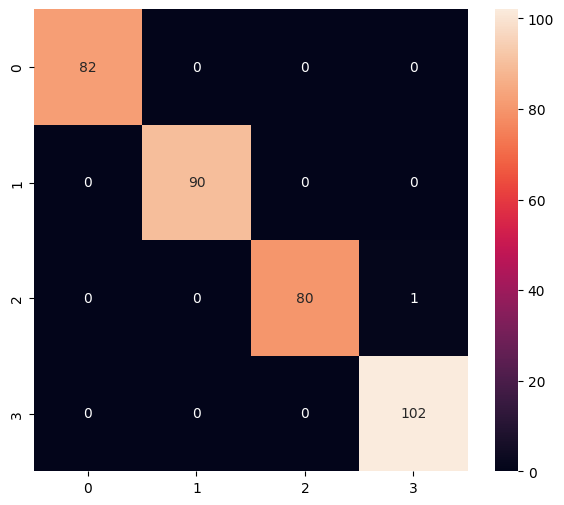

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        90
           2       1.00      0.99      0.99        81
           3       0.99      1.00      1.00       102

    accuracy                           1.00       355
   macro avg       1.00      1.00      1.00       355
weighted avg       1.00      1.00      1.00       355



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)